<a href="https://colab.research.google.com/github/amber717M/my-ML-DS-projects/blob/main/Microsoft_Stock_Forecasting_using_LSTMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('/content/MSFT.csv')

In [2]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060809,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062980,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064067,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062437,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061351,47894400
...,...,...,...,...,...,...,...
9255,2022-11-30,240.570007,255.330002,239.860001,255.139999,255.139999,47553800
9256,2022-12-01,253.869995,256.119995,250.919998,254.690002,254.690002,26041500
9257,2022-12-02,249.820007,256.059998,249.690002,255.020004,255.020004,21522800
9258,2022-12-05,252.009995,253.820007,248.059998,250.199997,250.199997,23435300


In [3]:
df= df[['Date','Close']]
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9255,2022-11-30,255.139999
9256,2022-12-01,254.690002
9257,2022-12-02,255.020004
9258,2022-12-05,250.199997


In [4]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9255    2022-11-30
9256    2022-12-01
9257    2022-12-02
9258    2022-12-05
9259    2022-12-06
Name: Date, Length: 9260, dtype: object

In [6]:
import datetime

def str_to_datetime(s):
  d = s.split('-')
  year, month, day = int(d[0]),int(d[1]),int(d[2])
  return datetime.datetime(year=year,month = month ,day =day)

datetime_obj = str_to_datetime('1986-03-15')  
datetime_obj

datetime.datetime(1986, 3, 15, 0, 0)

In [7]:
df['Date']= df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-7-74fa7e720c71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']= df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9255   2022-11-30
9256   2022-12-01
9257   2022-12-02
9258   2022-12-05
9259   2022-12-06
Name: Date, Length: 9260, dtype: datetime64[ns]

In [8]:
df


,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9255,2022-11-30,255.139999
9256,2022-12-01,254.690002
9257,2022-12-02,255.020004
9258,2022-12-05,250.199997


In [9]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2022-11-30,255.139999
2022-12-01,254.690002
2022-12-02,255.020004


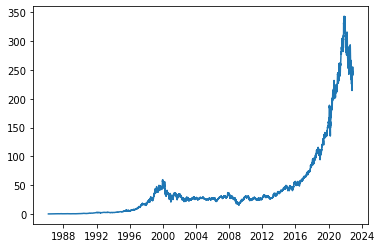

In [10]:
import matplotlib.pyplot as plt

plt.plot(df.index , df['Close'])

In [12]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '1986-03-18'
windowed_df = df_to_windowed_df(df, 
                                '1986-03-18', 
                                '2022-12-6', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,1986-03-18,0.097222,0.100694,0.102431,0.099826
1,1986-03-19,0.100694,0.102431,0.099826,0.098090
2,1986-03-20,0.102431,0.099826,0.098090,0.095486
3,1986-03-21,0.099826,0.098090,0.095486,0.092882
4,1986-03-24,0.098090,0.095486,0.092882,0.090278
...,...,...,...,...,...
9252,2022-11-30,247.490005,241.759995,240.330002,255.139999
9253,2022-12-01,241.759995,240.330002,255.139999,254.690002
9254,2022-12-02,240.330002,255.139999,254.690002,255.020004
9255,2022-12-05,255.139999,254.690002,255.020004,250.199997


In [13]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((9257,), (9257, 3, 1), (9257,))

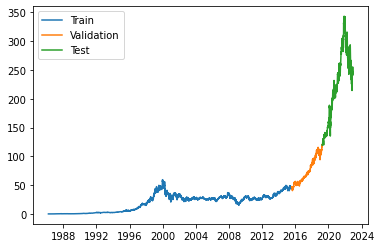

In [14]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
232/232 [==============================] - 4s 6ms/step - loss: 108.6562 - mean_absolute_error: 4.7426 - val_loss: 1089.4412 - val_mean_absolute_error: 24.7577
Epoch 2/100
232/232 [==============================] - 1s 4ms/step - loss: 0.3641 - mean_absolute_error: 0.3336 - val_loss: 909.6462 - val_mean_absolute_error: 21.8120
Epoch 3/100
232/232 [==============================] - 1s 4ms/step - loss: 0.3367 - mean_absolute_error: 0.3341 - val_loss: 828.3944 - val_mean_absolute_error: 20.3677
Epoch 4/100
232/232 [==============================] - 1s 4ms/step - loss: 0.3366 - mean_absolute_error: 0.3384 - val_loss: 777.8132 - val_mean_absolute_error: 19.5277
Epoch 5/100
232/232 [==============================] - 1s 4ms/step - loss: 0.3247 - mean_absolute_error: 0.3397 - val_loss: 752.5002 - val_mean_absolute_error: 19.1877
Epoch 6/100
232/232 [==============================] - 1s 4ms/step - loss: 0.3054 - mean_absolute_error: 0.3198 - val_loss: 718.7561 - val_mean_absolute_erro

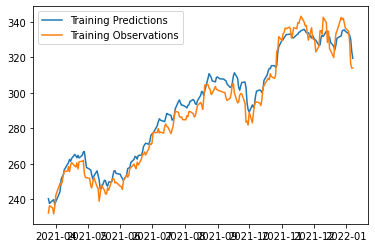

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

232/232 [==============================] - 1s 2ms/step


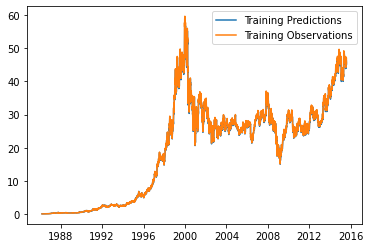

In [16]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

29/29 [==============================] - 0s 2ms/step


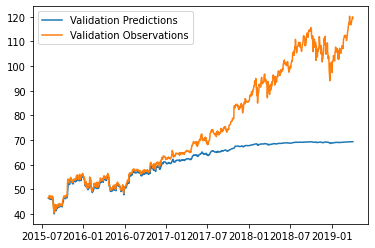

In [17]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

29/29 [==============================] - 0s 2ms/step


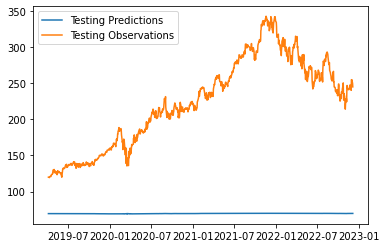

In [18]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

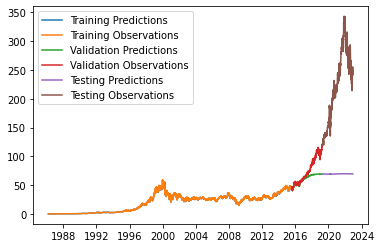

In [19]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [ ]:
# as able to see our model could not do well in extrapolating, but works almost well before the rise in the graph , we will train it on the data where it could not match the rising pattern


In [22]:
# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [23]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

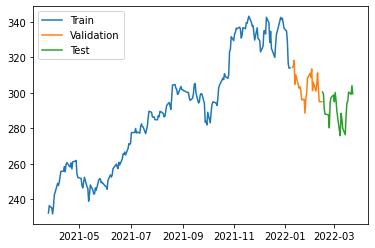

In [24]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 2s 86ms/step - loss: 84516.5312 - mean_absolute_error: 288.9745 - val_loss: 92165.1719 - val_mean_absolute_error: 303.4999
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 84209.7500 - mean_absolute_error: 288.4461 - val_loss: 91807.3125 - val_mean_absolute_error: 302.9098
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 83838.8359 - mean_absolute_error: 287.7999 - val_loss: 91349.1484 - val_mean_absolute_error: 302.1525
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 83320.5000 - mean_absolute_error: 286.8956 - val_loss: 90645.7266 - val_mean_absolute_error: 300.9863
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 82597.8203 - mean_absolute_error: 285.6339 - val_loss: 89806.3594 - val_mean_absolute_error: 299.5887
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 81697.4609 - mean_absolute_error: 284.0489 - val_loss: 88665.5

7/7 [==============================] - 0s 2ms/step


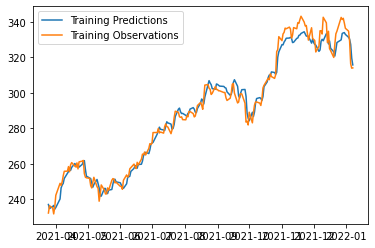

In [26]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 20ms/step


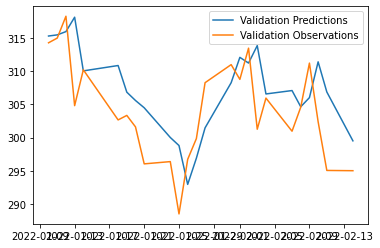

In [27]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 17ms/step


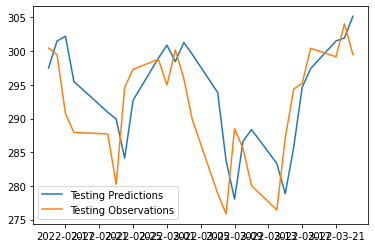

In [28]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

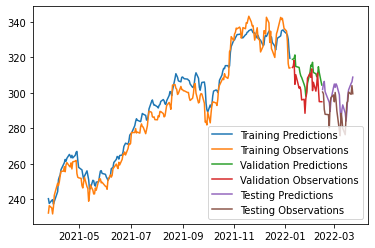

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

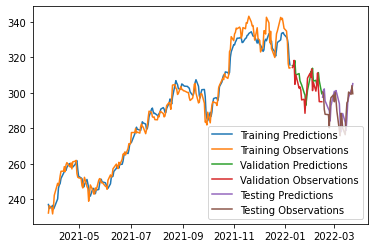

In [29]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [30]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 16ms/step


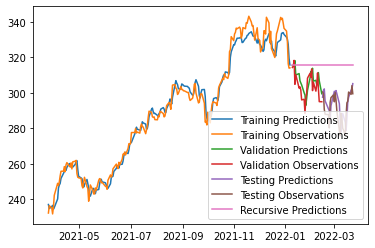

In [31]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])